<a href="https://colab.research.google.com/github/oakeshott/22PBLA18-2/blob/master/jupyer/22PBLA18_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install networkx graphillion matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!wget 'http://www.topology-zoo.org/files/Geant2001.gml' -O 'geant.gml'

--2023-01-06 15:15:51--  http://www.topology-zoo.org/files/Geant2001.gml
Resolving www.topology-zoo.org (www.topology-zoo.org)... 129.127.4.155
Connecting to www.topology-zoo.org (www.topology-zoo.org)|129.127.4.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9956 (9.7K)
Saving to: ‘geant.gml’

geant.gml           100%[===================>]   9.72K  --.-KB/s    in 0s      

2023-01-06 15:15:52 (118 MB/s) - ‘geant.gml’ saved [9956/9956]



# Tutorial

In [4]:
from graphillion import GraphSet
import graphillion.tutorial as tl
import networkx as nx

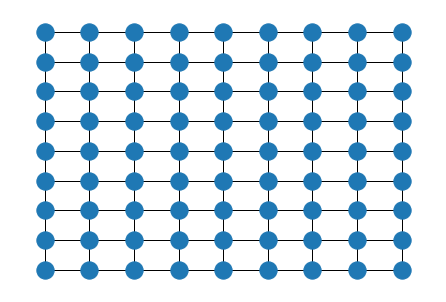

In [5]:
universe = tl.grid(8, 8)
GraphSet.set_universe(universe)
tl.draw(universe)

In [6]:
source = 1
destination = 81
paths = GraphSet.paths(source, destination)
len(paths)

3266598486981642

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 18), (10, 11), (10, 19), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 36), (28, 29), (28, 37), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 54), (46, 47), (46, 55), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 54), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 72), (64, 65), (64, 73), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81)]
[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 18), (10, 11), (10, 19), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (2

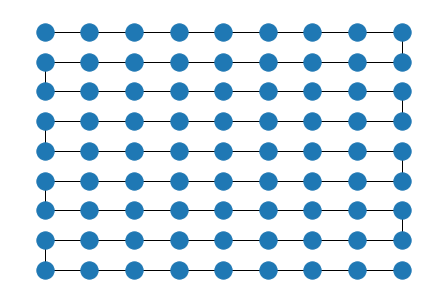

In [7]:
# print parts of paths
for i, path in enumerate(paths):
    print(path)
    if i > 10:
        break
tl.draw(paths.choice())

1017181798366164


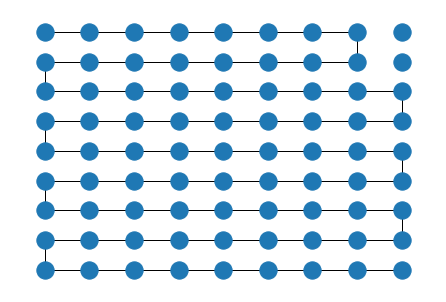

In [8]:
# Enumerate the paths excluding the node 18
pitfall = 18
paths = GraphSet.paths(source, destination).excluding(pitfall)
print(len(paths))
tl.draw(paths.choice())

27 38


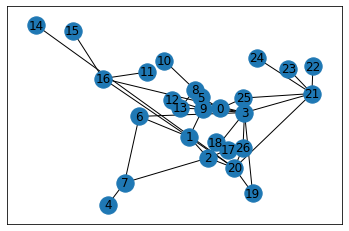

In [9]:
# Read an arbitrary graph as graphset
filename = '/content/geant.gml'
g = nx.read_gml(filename, label='id')
print(len(g.nodes()), len(g.edges()))
pos = {n: (g.nodes()[n]['Latitude'], g.nodes()[n]['Longitude']) for n in g.nodes()}
nx.draw_networkx(g, pos=pos)

In [12]:
source = 1
destination = 20
GraphSet.set_universe(g.edges())
paths = GraphSet.paths(source, destination)
print(len(paths))
print(paths.choice())

124
[(0, 3), (0, 5), (1, 9), (3, 21), (5, 8), (8, 13), (9, 13), (20, 21)]


In [13]:
# Calculate all-terminal network reliability
univ = tl.grid(4, 4)
GraphSet.set_universe(univ)
spanning_trees = GraphSet.trees(1, is_spanning=True) # A subgraph that is communicable at all vertices corresponds to a subgraph containing a spanning tree.
all_subgraphs = GraphSet({})
gs = all_subgraphs.supergraphs(spanning_trees)

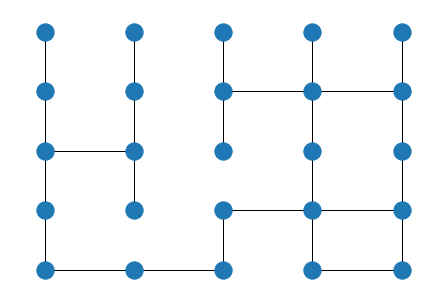

In [14]:
iterator = gs.rand_iter()
tl.draw(next(iterator)) # drawing a spanning tree

In [15]:
probs = {edge: 0.95  for edge in univ}
gs.probability(probs) # (all-terminal) network reliablity

0.987455319048074

#Task
In the following tasks, you use the geant network, which can be available at http://www.topology-zoo.org/files/Geant2001.gml
- Task 1: Write a program that calculates the $s$-$t$ network reliablity and calcualte the network reliablity. Please set the probability of each link to 0.95. 
- Task 2: Compare the all-terminal network reliablity and two-terminal network reliability